#Data Clean-up

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded2 = files.upload()

Saving Twitch_user_data_1MonthAgo.csv to Twitch_user_data_1MonthAgo.csv


In [ ]:
df = pd.read_csv('Twitch_user_data_1MonthAgo.csv')
df.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


In [ ]:
df.rename(columns={'Stream time(minutes)':'Stream_time_min'}, inplace=True)
df.rename(columns={'Watch time(Minutes)':'Watch_time_min'}, inplace=True)
df.columns = df.columns.str.replace(' ', '_') 
df.head()

,Channel,Watch_time_min,Stream_time_min,Peak_viewers,Average_viewers,Followers,Followers_gained,Views_gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


In [ ]:
# pd.set_option('display.max_rows', 200)
# pd.set_option('display.max_columns', 100)

In [ ]:
df['Stream_time_hr'] = df['Stream_time_min'] /60 


In [ ]:
df['Stream_time_hr'].head()

0    3587.50
1    3530.75
2    8588.00
3    8629.00
4    2061.00
Name: Stream_time_hr, dtype: float64

In [ ]:
df['Stream_time_days'] = df['Stream_time_hr'] / 24

df['Stream_time_days'].head()

0    149.479167
1    147.114583
2    357.833333
3    359.541667
4     85.875000
Name: Stream_time_days, dtype: float64

In [ ]:
df['Followers_gained_per_stream_time_days'] = df['Followers_gained'] / df['Stream_time_days']
df.head()

,Channel,Watch_time_min,Stream_time_min,Peak_viewers,Average_viewers,Followers,Followers_gained,Views_gained,Partnered,Mature,Language,Stream_time_hr,Stream_time_days,Followers_gained_per_stream_time_days
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English,3587.50,149.479167,11605.697561
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English,3530.75,147.114583,9313.719748
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese,8588.00,357.833333,2861.049837
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English,8629.00,359.541667,1958.009503
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English,2061.00,85.875000,24086.451237


In [ ]:
list(df.columns.values)


['Channel',
 'Watch_time_min',
 'Stream_time_min',
 'Peak_viewers',
 'Average_viewers',
 'Followers',
 'Followers_gained',
 'Views_gained',
 'Partnered',
 'Mature',
 'Language',
 'Stream_time_hr',
 'Stream_time_days',
 'Followers_gained_per_stream_time_days']

In [ ]:
index = ['Channel',
 'Watch_time_min',
 'Stream_time_min',
 'Stream_time_hr',
 'Stream_time_days',
 'Peak_viewers',
 'Average_viewers',
 'Followers',
 'Followers_gained',
 'Followers_gained_per_stream_time_days',
 'Views_gained',
 'Partnered',
 'Mature',
 'Language'
]

df = df[index]

In [ ]:
df.tail()

,Channel,Watch_time_min,Stream_time_min,Stream_time_hr,Stream_time_days,Peak_viewers,Average_viewers,Followers,Followers_gained,Followers_gained_per_stream_time_days,Views_gained,Partnered,Mature,Language
995,LITkillah,122524635,13560,226.00,9.416667,21359,9104,601927,562691,59754.796460,2162107,True,False,Spanish
996,빅헤드 (bighead033),122523705,153000,2550.00,106.250000,3940,793,213212,52289,492.131765,4399897,True,False,Korean
997,마스카 (newmasca),122452320,217410,3623.50,150.979167,6431,567,109068,-4942,-32.732993,3417970,True,False,Korean
998,AndyMilonakis,122311065,104745,1745.75,72.739583,10543,1153,547446,109111,1500.022340,3926918,True,False,English
999,Remx,122192850,99180,1653.00,68.875000,13788,1205,178553,59432,862.896552,2049420,True,False,French


#Graphing Data for Twitch

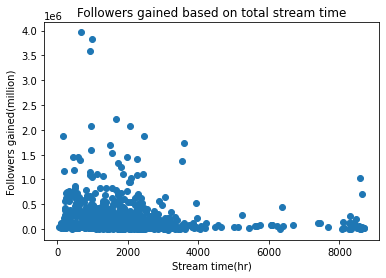

In [ ]:
figure, ax = plt.subplots()
ax.scatter(df['Stream_time_hr'], 
           df['Followers_gained'])

ax.set_title('Followers gained based on total stream time')
ax.set_xlabel('Stream time(hr)')
ax.set_ylabel('Followers gained(million)')

plt.show()

In [ ]:
df.describe()

,Watch_time_min,Stream_time_min,Stream_time_hr,Stream_time_days,Peak_viewers,Average_viewers,Followers,Followers_gained,Followers_gained_per_stream_time_days,Views_gained
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03
mean,4.184279e+08,120515.160000,2008.586000,83.691083,37065.051000,4781.040000,5.700541e+05,2.055185e+05,5144.693309,1.166817e+07
std,5.496355e+08,85376.201364,1422.936689,59.289029,60314.307686,8453.684965,8.044134e+05,3.399137e+05,14385.673894,2.490572e+07
min,1.221928e+08,3465.000000,57.750000,2.406250,496.000000,235.000000,3.660000e+03,-1.577200e+04,-120.521531,1.757880e+05
25%,1.631899e+08,73758.750000,1229.312500,51.221354,9113.750000,1457.750000,1.705462e+05,4.375825e+04,493.056012,3.880602e+06
50%,2.349908e+08,108240.000000,1804.000000,75.166667,16676.000000,2425.000000,3.180630e+05,9.835200e+04,1373.833531,6.456324e+06
75%,4.337399e+08,141843.750000,2364.062500,98.502604,37569.750000,4786.250000,6.243322e+05,2.361308e+05,3999.377922,1.219676e+07
max,6.196162e+09,521445.000000,8690.750000,362.114583,639375.000000,147643.000000,8.938903e+06,3.966525e+06,282551.359498,6.701375e+08


In [ ]:
df['Stream_time_days'].sort_values(ascending = True)

990      2.406250
927      2.531250
811      4.260417
109      4.302083
81       4.385417
          ...    
469    359.708333
306    360.010417
746    360.885417
992    362.104167
392    362.114583
Name: Stream_time_days, Length: 1000, dtype: float64

In [ ]:
df_sorted = df.sort_values(ascending = False, by = 'Stream_time_days')
df_sorted.head()

,Channel,Watch_time_min,Stream_time_min,Stream_time_hr,Stream_time_days,Peak_viewers,Average_viewers,Followers,Followers_gained,Followers_gained_per_stream_time_days,Views_gained,Partnered,Mature,Language
392,RiffTrax,293583075,521445,8690.75,362.114583,24765,562,79099,17200,47.498777,3313465,True,False,English
992,RelaxBeats,123273930,521430,8690.50,362.104167,2830,235,166162,29595,81.730625,1094850,True,False,English
746,Monstercat,163589370,519675,8661.25,360.885417,14261,313,788684,22331,61.878366,4084222,True,False,English
306,RocketBeansTV,360858030,518415,8640.25,360.010417,5223,696,416018,27024,75.064495,5973152,True,False,German
469,SaltyTeemo,247613265,517980,8633.00,359.708333,1803,476,173196,36103,100.367427,2117741,False,False,English


#T-Test For Twitch

Streamers should stream 5 hours a day, 5 days a week = 1303.57 hrs a year

Many hours streamed == greater than 1303.57
Not many hours streamed == less than 1303.57

In [ ]:
low_condition = df['Stream_time_hr'] <= 1303.57
df.loc[low_condition, 'Streams_a_lot'] = 0
df.loc[~low_condition, 'Streams_a_lot'] = 1

In [ ]:
df.tail()

,Channel,Watch_time_min,Stream_time_min,Stream_time_hr,Stream_time_days,Peak_viewers,Average_viewers,Followers,Followers_gained,Followers_gained_per_stream_time_days,Views_gained,Partnered,Mature,Language,Streams_a_lot
995,LITkillah,122524635,13560,226.00,9.416667,21359,9104,601927,562691,59754.796460,2162107,True,False,Spanish,0.0
996,빅헤드 (bighead033),122523705,153000,2550.00,106.250000,3940,793,213212,52289,492.131765,4399897,True,False,Korean,1.0
997,마스카 (newmasca),122452320,217410,3623.50,150.979167,6431,567,109068,-4942,-32.732993,3417970,True,False,Korean,1.0
998,AndyMilonakis,122311065,104745,1745.75,72.739583,10543,1153,547446,109111,1500.022340,3926918,True,False,English,1.0
999,Remx,122192850,99180,1653.00,68.875000,13788,1205,178553,59432,862.896552,2049420,True,False,French,1.0


In [ ]:
df['Streams_a_lot'].value_counts()

1.0    724
0.0    276
Name: Streams_a_lot, dtype: int64

$H_0: \mu_{StreamsALot} = \mu_{StreamsNotALot}$

$H_a: \mu_{StreamsALot} \neq \mu_{StreamsALot}$

**Null hypothesis**: Streamers who stream a lot(>1303.57 hours a year) and streamers who don't stream as much will have the same amount of followers gained

Significance level will be at 0.05%

In [ ]:
# import numpy as np
# from scipy import stats as st

# younger_ = Brain_df[Brain_df.Age == 1]

# younger = younger_[['Brain']]


# older_ = Brain_df[Brain_df.Age == 2]

# older = older_[['Brain']]

# t_stat, p_value = st.ttest_ind(younger,older,equal_var=False)

# print(t_stat)
# print(p_value)


In [ ]:
from scipy import stats as st

streams_a_lot_ = df[df['Streams_a_lot'] == 1]
streams_not_a_lot_ = df[df['Streams_a_lot'] == 0]

streams_a_lot_.head()

,Channel,Watch_time_min,Stream_time_min,Stream_time_hr,Stream_time_days,Peak_viewers,Average_viewers,Followers,Followers_gained,Followers_gained_per_stream_time_days,Views_gained,Partnered,Mature,Language,Streams_a_lot
0,xQcOW,6196161750,215250,3587.50,149.479167,222720,27716,3246298,1734810,11605.697561,93036735,True,False,English,1.0
1,summit1g,6091677300,211845,3530.75,147.114583,310998,25610,5310163,1370184,9313.719748,89705964,True,False,English,1.0
2,Gaules,5644590915,515280,8588.00,357.833333,387315,10976,1767635,1023779,2861.049837,102611607,True,True,Portuguese,1.0
3,ESL_CSGO,3970318140,517740,8629.00,359.541667,300575,7714,3944850,703986,1958.009503,106546942,True,False,English,1.0
4,Tfue,3671000070,123660,2061.00,85.875000,285644,29602,8938903,2068424,24086.451237,78998587,True,False,English,1.0


In [ ]:
streams_a_lot = streams_a_lot_[['Followers_gained']]
streams_not_a_lot = streams_not_a_lot_[['Followers_gained']]

streams_not_a_lot

,Followers_gained
13,3820532
14,3966525
15,1101093
21,255088
23,825004
...,...
985,46991
987,123363
988,732108
990,46367


In [ ]:
# t_stat, p_value = st.ttest_ind(younger,older,equal_var=False)
t_stat, p_value = st.ttest_ind(streams_a_lot, streams_not_a_lot, equal_var=False)

print('T-stat: ', t_stat)
print('P Value: ', p_value)

T-stat:  [-5.39913867]
P Value:  [1.27500748e-07]


Since the p_value is so close to 0 (1.28e-07) we reject the null hypothesis and conclude that there is a difference between followers gained for streamers who stream a lot and for streamers who don't stream as much.

# Linear Correlation between 'Followers Gained' and 'Stream Time'

Independent Variable = "Stream Time" 

Dependent Variable = "Followers Gained"

$H_0:$ The slope of the relationship between "Stream Time" and "Followers Gained" is equal to 0. (There is no relationship between "Stream Time" and "Followers Gained"

$H_a:$ The slope of the relationship between "Stream Time" and "Followers Gained" is not equal to 0. (There is a relationship between "Stream Time" and "Followers Gained"

Significance level will be at 0.05%


In [ ]:
df.head()

,Channel,Watch_time_min,Stream_time_min,Stream_time_hr,Stream_time_days,Peak_viewers,Average_viewers,Followers,Followers_gained,Followers_gained_per_stream_time_days,Views_gained,Partnered,Mature,Language,Streams_a_lot
0,xQcOW,6196161750,215250,3587.50,149.479167,222720,27716,3246298,1734810,11605.697561,93036735,True,False,English,1.0
1,summit1g,6091677300,211845,3530.75,147.114583,310998,25610,5310163,1370184,9313.719748,89705964,True,False,English,1.0
2,Gaules,5644590915,515280,8588.00,357.833333,387315,10976,1767635,1023779,2861.049837,102611607,True,True,Portuguese,1.0
3,ESL_CSGO,3970318140,517740,8629.00,359.541667,300575,7714,3944850,703986,1958.009503,106546942,True,False,English,1.0
4,Tfue,3671000070,123660,2061.00,85.875000,285644,29602,8938903,2068424,24086.451237,78998587,True,False,English,1.0


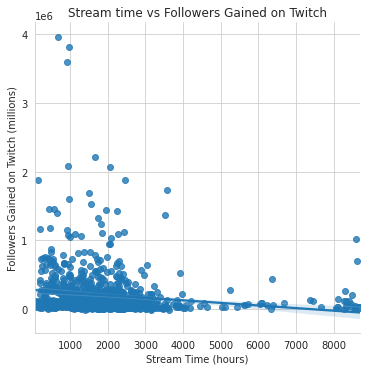

In [ ]:
import seaborn as sns

sns.lmplot(x='Stream_time_hr', y='Followers_gained', data=df)
sns.set_style("whitegrid")

plt.title('Stream time vs Followers Gained on Twitch')
plt.xlabel('Stream Time (hours)')
plt.ylabel('Followers Gained on Twitch (millions)')

plt.show()

In [ ]:
from scipy import stats

r_st_fg, p_val_st_fg = stats.pearsonr(df['Stream_time_hr'], df['Followers_gained'])
print('R Coefficient: ', r_st_fg)
print('P-Value: ', p_val_st_fg)

R Coefficient:  -0.15816478527011052
P-Value:  4.981386544982613e-07


The P-Value is extremely low at 4.98e-07 allows us to reject the Null Hypothesis and conclude that there is a linear correlation between "Stream Time" and "Followers Gained"

The linear correlation coefficent at -0.16 shows us that there is a weak negative correlation between "Stream Time" and "Followers Gained

In [ ]:
# model = ols('Time ~ Nitro', data=longbones).fit()

from statsmodels.formula.api import ols

# enter the model in the format y ~ x
model_st_fg = ols('Followers_gained ~ Stream_time_hr', data=df).fit()
model_st_fg.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Intercept         281408.321251
Stream_time_hr       -37.782693
dtype: float64

In [ ]:
print(model_st_fg.summary())

                            OLS Regression Results                            
Dep. Variable:       Followers_gained   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     25.61
Date:                Sun, 28 Feb 2021   Prob (F-statistic):           4.98e-07
Time:                        00:45:46   Log-Likelihood:                -14142.
No. Observations:                1000   AIC:                         2.829e+04
Df Residuals:                     998   BIC:                         2.830e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.814e+05   1.84e+04     15.


$\hat{Y} = b_0 + b_1 X$


**Simple Linear Regression Equation for Followers Gained based on Stream Time(hr)**
$\hat{Y} = 281408 - 37.78 X$



Calculate the residual for the XQC

In [ ]:
intercept = model_st_fg.params[0]
slope = model_st_fg.params[1]

x = df['Stream_time_hr'][0]

predicted = intercept + slope*x

print('Intercept: ', intercept)
print('Slope: ', slope)
print('Predicted value: ', predicted)

Intercept:  281408.3212509462
Slope:  -37.782692526457026
Predicted value:  145862.9118122816


In [ ]:
observed = df['Followers_gained'][0]

residual =  observed - predicted

residual

1588947.0881877183

# Outlier Removal - Streamtime

In [ ]:
df.describe()

,Watch_time_min,Stream_time_min,Stream_time_hr,Stream_time_days,Peak_viewers,Average_viewers,Followers,Followers_gained,Followers_gained_per_stream_time_days,Views_gained,Streams_a_lot
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03,1000.00000
mean,4.184279e+08,120515.160000,2008.586000,83.691083,37065.051000,4781.040000,5.700541e+05,2.055185e+05,5144.693309,1.166817e+07,0.72400
std,5.496355e+08,85376.201364,1422.936689,59.289029,60314.307686,8453.684965,8.044134e+05,3.399137e+05,14385.673894,2.490572e+07,0.44724
min,1.221928e+08,3465.000000,57.750000,2.406250,496.000000,235.000000,3.660000e+03,-1.577200e+04,-120.521531,1.757880e+05,0.00000
25%,1.631899e+08,73758.750000,1229.312500,51.221354,9113.750000,1457.750000,1.705462e+05,4.375825e+04,493.056012,3.880602e+06,0.00000
50%,2.349908e+08,108240.000000,1804.000000,75.166667,16676.000000,2425.000000,3.180630e+05,9.835200e+04,1373.833531,6.456324e+06,1.00000
75%,4.337399e+08,141843.750000,2364.062500,98.502604,37569.750000,4786.250000,6.243322e+05,2.361308e+05,3999.377922,1.219676e+07,1.00000
max,6.196162e+09,521445.000000,8690.750000,362.114583,639375.000000,147643.000000,8.938903e+06,3.966525e+06,282551.359498,6.701375e+08,1.00000


In [ ]:
Q1_IQR_ST = 1229.312500	
Q3_IQR_ST = 2364.062500
IQR_Streamtime = Q3_IQR_ST - Q1_IQR_ST

Minimum_Outlier_Streamtime = Q1_IQR_ST - (1.5*IQR_Streamtime)
Maximum_Outlier_Streamtime = Q3_IQR_ST + (1.5*IQR_Streamtime)

In [ ]:
print('Minimum Outlier: ', Minimum_Outlier_Streamtime)
print('Maximum Outlier: ', Maximum_Outlier_Streamtime)

Minimum Outlier:  -472.8125
Maximum Outlier:  4066.1875


In [ ]:
Not_Streamtime_Outlier_Condition = (df['Stream_time_hr'] >= Minimum_Outlier_Streamtime) & (df['Stream_time_hr'] <= Maximum_Outlier_Streamtime)

In [ ]:
df_exclude_streamtime_outlier = df[Not_Streamtime_Outlier_Condition]

In [ ]:
df_exclude_streamtime_outlier.head()

,Channel,Watch_time_min,Stream_time_min,Stream_time_hr,Stream_time_days,Peak_viewers,Average_viewers,Followers,Followers_gained,Followers_gained_per_stream_time_days,Views_gained,Partnered,Mature,Language,Streams_a_lot
0,xQcOW,6196161750,215250,3587.50,149.479167,222720,27716,3246298,1734810,11605.697561,93036735,True,False,English,1.0
1,summit1g,6091677300,211845,3530.75,147.114583,310998,25610,5310163,1370184,9313.719748,89705964,True,False,English,1.0
4,Tfue,3671000070,123660,2061.00,85.875000,285644,29602,8938903,2068424,24086.451237,78998587,True,False,English,1.0
5,Asmongold,3668799075,82260,1371.00,57.125000,263720,42414,1563438,554201,9701.549234,61715781,True,False,English,1.0
6,NICKMERCS,3360675195,136275,2271.25,94.635417,115633,24181,4074287,1089824,11516.026857,46084211,True,False,English,1.0


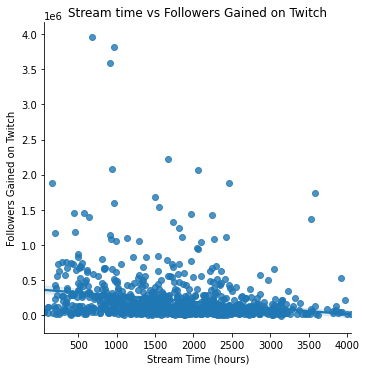

In [ ]:
sns.lmplot(x='Stream_time_hr', y='Followers_gained', data = df_exclude_streamtime_outlier)

plt.title('Stream time vs Followers Gained on Twitch')
plt.xlabel('Stream Time (hours)')
plt.ylabel('Followers Gained on Twitch')

plt.show()


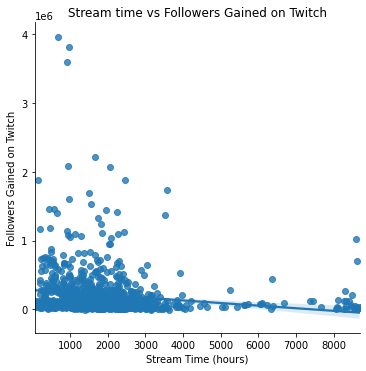

In [ ]:
sns.lmplot(x='Stream_time_hr', y='Followers_gained', data = df)

plt.title('Stream time vs Followers Gained on Twitch')
plt.xlabel('Stream Time (hours)')
plt.ylabel('Followers Gained on Twitch')

plt.show()


In [ ]:
model_st_fg_no_outl = ols('Followers_gained ~ Stream_time_hr', data=df_exclude_streamtime_outlier).fit()
print(model_st_fg_no_outl.summary())

                            OLS Regression Results                            
Dep. Variable:       Followers_gained   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     41.45
Date:                Sun, 28 Feb 2021   Prob (F-statistic):           1.92e-10
Time:                        00:45:47   Log-Likelihood:                -13470.
No. Observations:                 952   AIC:                         2.694e+04
Df Residuals:                     950   BIC:                         2.695e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.639e+05   2.63e+04     13.

In [ ]:
print(model_st_fg.summary())

                            OLS Regression Results                            
Dep. Variable:       Followers_gained   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     25.61
Date:                Sun, 28 Feb 2021   Prob (F-statistic):           4.98e-07
Time:                        00:45:47   Log-Likelihood:                -14142.
No. Observations:                1000   AIC:                         2.829e+04
Df Residuals:                     998   BIC:                         2.830e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.814e+05   1.84e+04     15.

In [ ]:
r_st_fg2, p_val_st_fg2 = stats.pearsonr(df_exclude_streamtime_outlier['Stream_time_hr'], df_exclude_streamtime_outlier['Followers_gained'])
print('R Coefficient: ', r_st_fg2)
print('P-Value: ', p_val_st_fg2)

R Coefficient:  -0.20446121675704776
P-Value:  1.919529982808843e-10


In [ ]:
r_st_fg, p_val_st_fg = stats.pearsonr(df['Stream_time_hr'], df['Followers_gained'])
print('R Coefficient: ', r_st_fg)
print('P-Value: ', p_val_st_fg)

R Coefficient:  -0.15816478527011052
P-Value:  4.981386544982613e-07


# Outlier Removal - Streamtime + Followers Gained

In [ ]:
df.describe()

,Watch_time_min,Stream_time_min,Stream_time_hr,Stream_time_days,Peak_viewers,Average_viewers,Followers,Followers_gained,Followers_gained_per_stream_time_days,Views_gained,Streams_a_lot
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03,1000.00000
mean,4.184279e+08,120515.160000,2008.586000,83.691083,37065.051000,4781.040000,5.700541e+05,2.055185e+05,5144.693309,1.166817e+07,0.72400
std,5.496355e+08,85376.201364,1422.936689,59.289029,60314.307686,8453.684965,8.044134e+05,3.399137e+05,14385.673894,2.490572e+07,0.44724
min,1.221928e+08,3465.000000,57.750000,2.406250,496.000000,235.000000,3.660000e+03,-1.577200e+04,-120.521531,1.757880e+05,0.00000
25%,1.631899e+08,73758.750000,1229.312500,51.221354,9113.750000,1457.750000,1.705462e+05,4.375825e+04,493.056012,3.880602e+06,0.00000
50%,2.349908e+08,108240.000000,1804.000000,75.166667,16676.000000,2425.000000,3.180630e+05,9.835200e+04,1373.833531,6.456324e+06,1.00000
75%,4.337399e+08,141843.750000,2364.062500,98.502604,37569.750000,4786.250000,6.243322e+05,2.361308e+05,3999.377922,1.219676e+07,1.00000
max,6.196162e+09,521445.000000,8690.750000,362.114583,639375.000000,147643.000000,8.938903e+06,3.966525e+06,282551.359498,6.701375e+08,1.00000


In [ ]:
Q1_IQR_FG = 4.375825e+04	
Q3_IQR_FG = 2.361308e+05
IQR_FG = Q3_IQR_FG - Q1_IQR_FG

Minimum_Outlier_FG = Q1_IQR_FG - (1.5*IQR_FG)
Maximum_Outlier_FG = Q3_IQR_FG + (1.5*IQR_FG)

In [ ]:
print('Minimum Outlier: ', Minimum_Outlier_FG)
print('Maximum Outlier: ', Maximum_Outlier_FG)

Minimum Outlier:  -244800.57499999995
Maximum Outlier:  524689.625


In [ ]:
Not_FG_Outlier_Condition = (df['Followers_gained'] >= Minimum_Outlier_FG) & (df['Followers_gained'] <= Maximum_Outlier_FG)

df_exclude_fg_outlier = df[Not_FG_Outlier_Condition]
df_exclude_fg_outlier.head()

,Channel,Watch_time_min,Stream_time_min,Stream_time_hr,Stream_time_days,Peak_viewers,Average_viewers,Followers,Followers_gained,Followers_gained_per_stream_time_days,Views_gained,Partnered,Mature,Language,Streams_a_lot
7,Fextralife,3301867485,147885,2464.75,102.697917,68795,18985,508816,425468,4142.907800,670137548,True,False,English,1.0
11,LIRIK,2832930285,128490,2141.50,89.229167,89170,21739,2666382,199077,2231.075414,50504526,True,False,English,1.0
12,Riot Games (riotgames),2674646715,80820,1347.00,56.125000,639375,20960,4487489,497678,8867.314031,56855694,True,False,English,1.0
16,sodapoppin,2329440420,115305,1921.75,80.072917,107833,19659,2786162,236169,2949.424223,39334821,True,True,English,1.0
17,풍월량 (hanryang1125),2186662470,181230,3020.50,125.854167,26999,12201,494445,92205,732.633670,34405975,True,False,Korean,1.0


In [ ]:
df_exclude_fg_st_outlier = df_exclude_fg_outlier[Not_Streamtime_Outlier_Condition]
df_exclude_fg_st_outlier.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Channel,Watch_time_min,Stream_time_min,Stream_time_hr,Stream_time_days,Peak_viewers,Average_viewers,Followers,Followers_gained,Followers_gained_per_stream_time_days,Views_gained,Partnered,Mature,Language,Streams_a_lot
7,Fextralife,3301867485,147885,2464.75,102.697917,68795,18985,508816,425468,4142.907800,670137548,True,False,English,1.0
11,LIRIK,2832930285,128490,2141.50,89.229167,89170,21739,2666382,199077,2231.075414,50504526,True,False,English,1.0
12,Riot Games (riotgames),2674646715,80820,1347.00,56.125000,639375,20960,4487489,497678,8867.314031,56855694,True,False,English,1.0
16,sodapoppin,2329440420,115305,1921.75,80.072917,107833,19659,2786162,236169,2949.424223,39334821,True,True,English,1.0
17,풍월량 (hanryang1125),2186662470,181230,3020.50,125.854167,26999,12201,494445,92205,732.633670,34405975,True,False,Korean,1.0


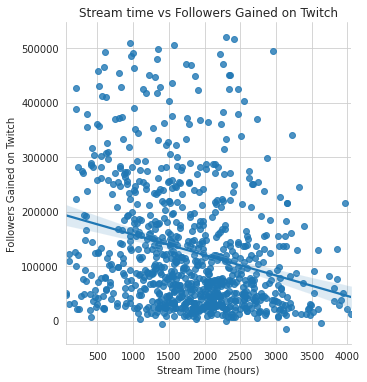

In [ ]:
sns.lmplot(x='Stream_time_hr', y='Followers_gained', data = df_exclude_fg_st_outlier)

sns.set_style("whitegrid")

plt.title('Stream time vs Followers Gained on Twitch')
plt.xlabel('Stream Time (hours)')
plt.ylabel('Followers Gained on Twitch')

plt.show()


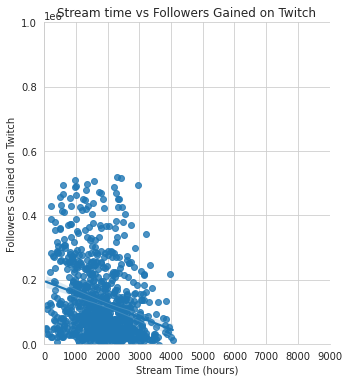

In [ ]:

sns.lmplot(x='Stream_time_hr', y='Followers_gained', data = df_exclude_fg_st_outlier)

sns.set_style("whitegrid")

plt.title('Stream time vs Followers Gained on Twitch')
plt.xlabel('Stream Time (hours)')
plt.ylabel('Followers Gained on Twitch')
plt.ylim(0, 1000000)
plt.xlim(0, 9000)

plt.show()


In [ ]:
model_st_fg_no_outl_2 = ols('Followers_gained ~ Stream_time_hr', data = df_exclude_fg_st_outlier).fit()
print(model_st_fg_no_outl_2.summary())

                            OLS Regression Results                            
Dep. Variable:       Followers_gained   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     61.46
Date:                Sun, 28 Feb 2021   Prob (F-statistic):           1.33e-14
Time:                        00:45:48   Log-Likelihood:                -11264.
No. Observations:                 864   AIC:                         2.253e+04
Df Residuals:                     862   BIC:                         2.254e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.954e+05   9403.079     20.

In [ ]:
print(model_st_fg_no_outl.summary())

                            OLS Regression Results                            
Dep. Variable:       Followers_gained   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     41.45
Date:                Sun, 28 Feb 2021   Prob (F-statistic):           1.92e-10
Time:                        00:45:48   Log-Likelihood:                -13470.
No. Observations:                 952   AIC:                         2.694e+04
Df Residuals:                     950   BIC:                         2.695e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.639e+05   2.63e+04     13.

In [ ]:
print(model_st_fg.summary())

                            OLS Regression Results                            
Dep. Variable:       Followers_gained   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     25.61
Date:                Sun, 28 Feb 2021   Prob (F-statistic):           4.98e-07
Time:                        00:45:48   Log-Likelihood:                -14142.
No. Observations:                1000   AIC:                         2.829e+04
Df Residuals:                     998   BIC:                         2.830e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.814e+05   1.84e+04     15.

In [ ]:
r_st_fg3, p_val_st_fg3 = stats.pearsonr(df_exclude_fg_st_outlier['Stream_time_hr'], df_exclude_fg_st_outlier['Followers_gained'])
print('R Coefficient3: ', r_st_fg3)
print('P-Value3: ', p_val_st_fg3)
print('R Coefficient2: ', r_st_fg2)
print('P-Value2: ', p_val_st_fg2)
print('R Coefficient: ', r_st_fg)
print('P-Value: ', p_val_st_fg)

R Coefficient3:  -0.2579774404321478
P-Value3:  1.3318863852482777e-14
R Coefficient2:  -0.20446121675704776
P-Value2:  1.919529982808843e-10
R Coefficient:  -0.15816478527011052
P-Value:  4.981386544982613e-07


# Logistic Regression

In [ ]:
df.head()

,Channel,Watch_time_min,Stream_time_min,Stream_time_hr,Stream_time_days,Peak_viewers,Average_viewers,Followers,Followers_gained,Followers_gained_per_stream_time_days,Views_gained,Partnered,Mature,Language,Streams_a_lot
0,xQcOW,6196161750,215250,3587.50,149.479167,222720,27716,3246298,1734810,11605.697561,93036735,True,False,English,1.0
1,summit1g,6091677300,211845,3530.75,147.114583,310998,25610,5310163,1370184,9313.719748,89705964,True,False,English,1.0
2,Gaules,5644590915,515280,8588.00,357.833333,387315,10976,1767635,1023779,2861.049837,102611607,True,True,Portuguese,1.0
3,ESL_CSGO,3970318140,517740,8629.00,359.541667,300575,7714,3944850,703986,1958.009503,106546942,True,False,English,1.0
4,Tfue,3671000070,123660,2061.00,85.875000,285644,29602,8938903,2068424,24086.451237,78998587,True,False,English,1.0


In [ ]:
df['Log_stream_time_hr'] = np.log(df['Stream_time_hr'])
df.head()

,Channel,Watch_time_min,Stream_time_min,Stream_time_hr,Stream_time_days,Peak_viewers,Average_viewers,Followers,Followers_gained,Followers_gained_per_stream_time_days,Views_gained,Partnered,Mature,Language,Streams_a_lot,Log_stream_time_hr
0,xQcOW,6196161750,215250,3587.50,149.479167,222720,27716,3246298,1734810,11605.697561,93036735,True,False,English,1.0,8.185211
1,summit1g,6091677300,211845,3530.75,147.114583,310998,25610,5310163,1370184,9313.719748,89705964,True,False,English,1.0,8.169266
2,Gaules,5644590915,515280,8588.00,357.833333,387315,10976,1767635,1023779,2861.049837,102611607,True,True,Portuguese,1.0,9.058121
3,ESL_CSGO,3970318140,517740,8629.00,359.541667,300575,7714,3944850,703986,1958.009503,106546942,True,False,English,1.0,9.062884
4,Tfue,3671000070,123660,2061.00,85.875000,285644,29602,8938903,2068424,24086.451237,78998587,True,False,English,1.0,7.630947


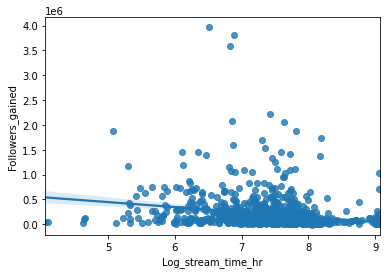

In [ ]:
log_plot = sns.regplot(x="Log_stream_time_hr", y="Followers_gained", data=df)
log_plot

plt.show()

In [ ]:
model_st_fg_log = ols('Followers_gained ~ Log_stream_time_hr', data = df).fit()
print(model_st_fg_log.summary())

                            OLS Regression Results                            
Dep. Variable:       Followers_gained   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     43.10
Date:                Sun, 28 Feb 2021   Prob (F-statistic):           8.36e-11
Time:                        00:45:49   Log-Likelihood:                -14134.
No. Observations:                1000   AIC:                         2.827e+04
Df Residuals:                     998   BIC:                         2.828e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           9.466e+05   1.13

In [ ]:
print(model_st_fg_no_outl_2.summary())

                            OLS Regression Results                            
Dep. Variable:       Followers_gained   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     61.46
Date:                Sun, 28 Feb 2021   Prob (F-statistic):           1.33e-14
Time:                        00:45:49   Log-Likelihood:                -11264.
No. Observations:                 864   AIC:                         2.253e+04
Df Residuals:                     862   BIC:                         2.254e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.954e+05   9403.079     20.

In [ ]:
r_st_fg_log, p_val_st_fg_log = stats.pearsonr(df['Log_stream_time_hr'], df['Followers_gained'])
print('R Coefficient_Log: ', r_st_fg_log)
print('P-Value_Log: ', p_val_st_fg_log)
print('R Coefficient3: ', r_st_fg3)
print('P-Value3: ', p_val_st_fg3)
print('R Coefficient2: ', r_st_fg2)
print('P-Value2: ', p_val_st_fg2)
print('R Coefficient: ', r_st_fg)
print('P-Value: ', p_val_st_fg)

R Coefficient_Log:  -0.20345936987492041
P-Value_Log:  8.361778976627629e-11
R Coefficient3:  -0.2579774404321478
P-Value3:  1.3318863852482777e-14
R Coefficient2:  -0.20446121675704776
P-Value2:  1.919529982808843e-10
R Coefficient:  -0.15816478527011052
P-Value:  4.981386544982613e-07


# Logistic Regression with No Outliers

In [ ]:
df_exclude_fg_st_outlier.head()

,Channel,Watch_time_min,Stream_time_min,Stream_time_hr,Stream_time_days,Peak_viewers,Average_viewers,Followers,Followers_gained,Followers_gained_per_stream_time_days,Views_gained,Partnered,Mature,Language,Streams_a_lot
7,Fextralife,3301867485,147885,2464.75,102.697917,68795,18985,508816,425468,4142.907800,670137548,True,False,English,1.0
11,LIRIK,2832930285,128490,2141.50,89.229167,89170,21739,2666382,199077,2231.075414,50504526,True,False,English,1.0
12,Riot Games (riotgames),2674646715,80820,1347.00,56.125000,639375,20960,4487489,497678,8867.314031,56855694,True,False,English,1.0
16,sodapoppin,2329440420,115305,1921.75,80.072917,107833,19659,2786162,236169,2949.424223,39334821,True,True,English,1.0
17,풍월량 (hanryang1125),2186662470,181230,3020.50,125.854167,26999,12201,494445,92205,732.633670,34405975,True,False,Korean,1.0


In [ ]:
df_exclude_fg_st_outlier['Log_stream_time_hr'] = np.log(df_exclude_fg_st_outlier['Stream_time_hr'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_exclude_fg_st_outlier.head()

,Channel,Watch_time_min,Stream_time_min,Stream_time_hr,Stream_time_days,Peak_viewers,Average_viewers,Followers,Followers_gained,Followers_gained_per_stream_time_days,Views_gained,Partnered,Mature,Language,Streams_a_lot,Log_stream_time_hr
7,Fextralife,3301867485,147885,2464.75,102.697917,68795,18985,508816,425468,4142.907800,670137548,True,False,English,1.0,7.809846
11,LIRIK,2832930285,128490,2141.50,89.229167,89170,21739,2666382,199077,2231.075414,50504526,True,False,English,1.0,7.669262
12,Riot Games (riotgames),2674646715,80820,1347.00,56.125000,639375,20960,4487489,497678,8867.314031,56855694,True,False,English,1.0,7.205635
16,sodapoppin,2329440420,115305,1921.75,80.072917,107833,19659,2786162,236169,2949.424223,39334821,True,True,English,1.0,7.560992
17,풍월량 (hanryang1125),2186662470,181230,3020.50,125.854167,26999,12201,494445,92205,732.633670,34405975,True,False,Korean,1.0,8.013178


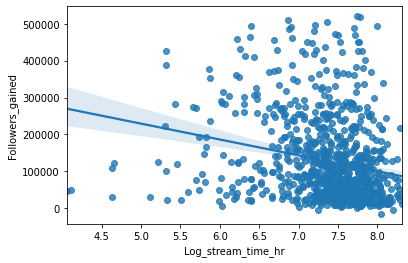

In [ ]:
log_plot_no_out = sns.regplot(x="Log_stream_time_hr", y="Followers_gained", data=df_exclude_fg_st_outlier)
log_plot_no_out

plt.show()

In [ ]:
model_st_fg_log_no_out = ols('Followers_gained ~ Log_stream_time_hr', data = df_exclude_fg_st_outlier).fit()
print(model_st_fg_log_no_out.summary())

                            OLS Regression Results                            
Dep. Variable:       Followers_gained   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     45.24
Date:                Sun, 28 Feb 2021   Prob (F-statistic):           3.17e-11
Time:                        00:45:49   Log-Likelihood:                -11272.
No. Observations:                 864   AIC:                         2.255e+04
Df Residuals:                     862   BIC:                         2.256e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4.444e+05   4.72

In [ ]:
r_st_fg_log2, p_val_st_fg_log2 = stats.pearsonr(df_exclude_fg_st_outlier['Log_stream_time_hr'], df_exclude_fg_st_outlier['Followers_gained'])
print(r_st_fg_log2, p_val_st_fg_log2)

-0.22330422454974058 3.173790476914282e-11


In [ ]:
print('R Coefficient_Log_No_Out: ', r_st_fg_log2)
print('P-Value_Log_No_Out: ', p_val_st_fg_log2)
print('R Coefficient_Log: ', r_st_fg_log)
print('P-Value_Log: ', p_val_st_fg_log)
print('R Coefficient3: ', r_st_fg3)
print('P-Value3: ', p_val_st_fg3)
print('R Coefficient2: ', r_st_fg2)
print('P-Value2: ', p_val_st_fg2)
print('R Coefficient: ', r_st_fg)
print('P-Value: ', p_val_st_fg)

R Coefficient_Log_No_Out:  -0.22330422454974058
P-Value_Log_No_Out:  3.173790476914282e-11
R Coefficient_Log:  -0.20345936987492041
P-Value_Log:  8.361778976627629e-11
R Coefficient3:  -0.2579774404321478
P-Value3:  1.3318863852482777e-14
R Coefficient2:  -0.20446121675704776
P-Value2:  1.919529982808843e-10
R Coefficient:  -0.15816478527011052
P-Value:  4.981386544982613e-07


#Multiple Regression

In [ ]:
df_exclude_fg_st_outlier['Mature'].value_counts()

False    656
True     208
Name: Mature, dtype: int64

In [ ]:
df_exclude_fg_st_outlier.head()

,Channel,Watch_time_min,Stream_time_min,Stream_time_hr,Stream_time_days,Peak_viewers,Average_viewers,Followers,Followers_gained,Followers_gained_per_stream_time_days,Views_gained,Partnered,Mature,Language,Streams_a_lot,Log_stream_time_hr
7,Fextralife,3301867485,147885,2464.75,102.697917,68795,18985,508816,425468,4142.907800,670137548,True,False,English,1.0,7.809846
11,LIRIK,2832930285,128490,2141.50,89.229167,89170,21739,2666382,199077,2231.075414,50504526,True,False,English,1.0,7.669262
12,Riot Games (riotgames),2674646715,80820,1347.00,56.125000,639375,20960,4487489,497678,8867.314031,56855694,True,False,English,1.0,7.205635
16,sodapoppin,2329440420,115305,1921.75,80.072917,107833,19659,2786162,236169,2949.424223,39334821,True,True,English,1.0,7.560992
17,풍월량 (hanryang1125),2186662470,181230,3020.50,125.854167,26999,12201,494445,92205,732.633670,34405975,True,False,Korean,1.0,8.013178


In [ ]:
from statsmodels.formula.api import ols

#Enter the model in the format Y ~ X

model_mult_st_foll = ols('Followers_gained ~ Stream_time_hr + Followers', data = df_exclude_fg_st_outlier).fit()

#Print the model summary
print(model_mult_st_foll.summary())

                            OLS Regression Results                            
Dep. Variable:       Followers_gained   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     157.1
Date:                Sun, 28 Feb 2021   Prob (F-statistic):           7.02e-59
Time:                        00:45:49   Log-Likelihood:                -11160.
No. Observations:                 864   AIC:                         2.233e+04
Df Residuals:                     861   BIC:                         2.234e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.294e+05   9378.986     13.

In [ ]:
model_mult_st_foll2 = ols('Followers_gained ~ Stream_time_hr + Followers + Watch_time_min', data = df_exclude_fg_st_outlier).fit()

#Print the model summary
print(model_mult_st_foll2.summary())

                            OLS Regression Results                            
Dep. Variable:       Followers_gained   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     116.2
Date:                Sun, 28 Feb 2021   Prob (F-statistic):           3.68e-63
Time:                        00:45:49   Log-Likelihood:                -11147.
No. Observations:                 864   AIC:                         2.230e+04
Df Residuals:                     860   BIC:                         2.232e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        1.28e+05   9252.239     13.

In [ ]:
model_mult_st_foll3 = ols('Followers_gained ~ Followers + Watch_time_min', data = df_exclude_fg_st_outlier).fit()

#Print the model summary
print(model_mult_st_foll3.summary())

                            OLS Regression Results                            
Dep. Variable:       Followers_gained   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     134.4
Date:                Sun, 28 Feb 2021   Prob (F-statistic):           1.59e-51
Time:                        00:45:49   Log-Likelihood:                -11177.
No. Observations:                 864   AIC:                         2.236e+04
Df Residuals:                     861   BIC:                         2.237e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        6.76e+04   5244.107     12.

#Summary

Linear Correlation between 'Followers Gained' and 'Streamtime': 
*   P-Value = 4.981386544982613e-07
*   R-Coefficent = -0.15816478527011052
*   Adjusted R^2 = 0.024

"Linear" Outliers Removed: 
*   P-Value = 1.3318863852482777e-14
*   R-Coefficent = -0.2579774404321478
*   Adjusted R^2 = 0.065

Logistical Correlation between 'Followers Gained' and 'Streamtime':
*   P-Value = 8.361778976627629e-11
*   R-Coefficent =-0.20345936987492041
*   Adjusted R^2 = 0.040

"Logistical..." Outliers Removed:
*   P-Value = 3.173790476914282e-11
*   R-Coefficent = -0.22330422454974058
*   Adjusted R^2 = 0.049




Multiple Regressions: 'Followers Gained', 'Streamtime', 'Followers' 
*   P-Value = 0.000
*   R-Coefficent = -0.51575
*   Adjusted R^2 = 0.266

Multiple Regressions: 'Followers Gained', 'Streamtime', 'Followers', Watch_Time_min 
*   P-Value = 0.000
*   R-Coefficent = -0.5348
*   Adjusted R^2 = 0.286

Multiple Regressions: 'Followers Gained', 'Followers',  Watch_Time_min 
*   P-Value = 0.000
*   R-Coefficent = -0.4879
*   Adjusted R^2 = 0.238

#Misc

In [ ]:
df_sort1 = df.sort_values(by = ["Average_viewers"], ascending = True)
df_sort1.head()

,Channel,Watch_time_min,Stream_time_min,Stream_time_hr,Stream_time_days,Peak_viewers,Average_viewers,Followers,Followers_gained,Followers_gained_per_stream_time_days,Views_gained,Partnered,Mature,Language,Streams_a_lot,Log_stream_time_hr
992,RelaxBeats,123273930,521430,8690.50,362.104167,2830,235,166162,29595,81.730625,1094850,True,False,English,1.0,9.069986
890,Japan_ASMR,138935670,509670,8494.50,353.937500,496,271,67707,32649,92.245100,1272641,True,False,Japanese,1.0,9.047174
828,MarketTradersTV,148900110,499215,8320.25,346.677083,1357,297,30413,12081,34.847991,981536,True,False,English,1.0,9.026448
746,Monstercat,163589370,519675,8661.25,360.885417,14261,313,788684,22331,61.878366,4084222,True,False,English,1.0,9.066614
758,voicetv,162510660,514845,8580.75,357.531250,1874,314,3660,1328,3.714361,4001475,True,False,Thai,1.0,9.057277
